# Essex County, MA School Districts x Performance

Using dataset developed with this notebook using data from Massachusetts Department of Education (DOE) and U.S. Census Bureau data for school districts:
https://github.com/semerriam/essex-county-school-districts/blob/main/ec-school-data/essex_county_public_schools_two_towns.ipynb

In [1]:
import pandas as pd
from plotnine import *

# importing statsmodels (for linear regression in python)
import statsmodels.formula.api as smf

/Users/sm/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
pd.set_option("display.max_columns", None)

# Scratchpad 

Welcome to your scratchpad for this exploratory data analysis. This is your "messy notebook". 

Load some data, run summary stats, create plots to explore the data, and run some exploratory regressions.

> Sidenote 🤖 - Using R and Python in the same notebook.
>
> Just a reminder that if you're a SideQuest-er 🤖 and want to use both R and Python, you can grab the top cells in the jupyter-quickstart notebook https://github.com/dmil/jupyter-quickstart. I find that ggplot in R is a bit more flexible and feature-full than Plotnine, and there is a lot more material online on running regressions in R than using statsmodels in Python. For this reason, I generally use R for plotting and regressions, but you're welcome to use either (or both)!


## Load Data

Code for loading raw data like `pd.read_csv()` etc. -- will go into this section. 

In [3]:
df = pd.read_csv("data//input_MA_DOE_Essex_county_profiles_w_census.csv", encoding="utf-8")
df

,district_code,district_name_w_charters,district_name_x,total_num_of_classes,average_class_size,number_of_students,african_american_pct,asian_pct,hispanic_pct,white_pct,native_american_pct,native_hawaiian_pacific_islander_pct,multi-race_non-hispanic_pct,tests_taken_x,score=1_x,score=2_x,score=3_x,score=4_x,score=5_x,pct_score_1-2_x,pct_score_3-5_x,tests_taken_y,score=1_y,score=2_y,score=3_y,score=4_y,score=5_y,pct_score_1-2_y,pct_score_3-5_y,tests_takers,tests_taken_x.1,one_test,two_tests,three_tests,four_tests,five_or_more_tests,high_school_graduates_(num),attending_coll./univ._(num),attending_coll./univ._(pct),private_two-year_(pct),private_four-year_(pct),public_two-year_(pct),public_four-year_(pct),ma_community_college_(pct),ma_state_university_(pct),univ.of_mass._(pct),tests_taken_y.1,reading_/_writing,writing,math,num_in_cohort,pct_graduated,pct_still_in_school,pct_non-grad_completers,pct_h.s._equiv.,pct_dropped_out,pct_permanently_excluded,towns,school_name,fact,population_estimates_july_1_2021_(v2021),population_estimates_base_april_1_2020_(v2021),population_percent_change_-_april_1_2020_(estimates_base)_to_july_1_2021_(v2021),population_census_april_1_2020,population_census_april_1_2010,persons_under_5_years_percent,persons_under_18_years_percent,persons_65_years_and_over_percent,female_persons_percent,white_alone_percent,black_or_african_american_alone_percent,american_indian_and_alaska_native_alone_percent,asian_alone_percent,native_hawaiian_and_other_pacific_islander_alone_percent,two_or_more_races_percent,hispanic_or_latino_percent,white_alone_not_hispanic_or_latino_percent,veterans_2015-2019,foreign_born_persons_percent_2015-2019,housing_units__july_1_2019__(v2019),owner-occupied_housing_unit_rate_2015-2019,median_value_of_owner-occupied_housing_units_2015-2019,median_selected_monthly_owner_costs_-with_a_mortgage_2015-2019,median_selected_monthly_owner_costs_-without_a_mortgage_2015-2019,median_gross_rent_2015-2019,building_permits_2020,households_2015-2019,persons_per_household_2015-2019,living_in_same_house_1_year_ago_percent_of_persons_age_1_year+_2015-2019,language_other_than_english_spoken_at_home_percent_of_persons_age_5_years+_2015-2019,households_with_a_computer_percent_2015-2019,households_with_a_broadband_internet_subscription_percent_2015-2019,high_school_graduate_or_higher_percent_of_persons_age_25_years+_2015-2019,bachelor's_degree_or_higher_percent_of_persons_age_25_years+_2015-2019,with_a_disability_under_age_65_years_percent_2015-2019,persons__without_health_insurance_under_age_65_years_percent,in_civilian_labor_force_total_percent_of_population_age_16_years+_2015-2019,in_civilian_labor_force_female_percent_of_population_age_16_years+_2015-2019,total_accommodation_and_food_services_sales_2012_($1000),total_health_care_and_social_assistance_receipts/revenue_2012_($1000),total_manufacturers_shipments_2012_($1000),total_retail_sales_2012_($1000),total_retail_sales_per_capita_2012,mean_travel_time_to_work_(minutes)_workers_age_16_years+_2015-2019,median_household_income,per_capita_income_in_past_12_months_(in_2019_dollars)_2015-2019,persons_in_poverty_percent,total_employer_establishments_2019,total_employment_2019,total_annual_payroll_2019_($1000),total_employment_percent_change_2018-2019,total_nonemployer_establishments_2018,all_firms_2012,men-owned_firms_2012,women-owned_firms_2012,minority-owned_firms_2012,nonminority-owned_firms_2012,veteran-owned_firms_2012,nonveteran-owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010,fips_code
0,70000.0,Amesbury,Amesbury,"1,115",15.1,"1,869",1.9,1.2,9.7,82.6,0.2,0.1,4.3,126.0,18.0,34.0,46.0,19.0,9.0,41.3,58.7,126.0,18.0,34.0,46.0,19.0,9.0,41.3,58.7,84.0,126.0,43.0,40.0,1.0,0.0,0.0,151.0,102.0,67.5,0.0,33.3,24.5,42.2,22.5,3.9,13.7,45.0,596.0,NaN,570.0,165,87.9,9.1,0.0,0.0,3.0,0.0,Amesbury,Amesbury High School,"Amesbury Town city, Massachusetts",NaN,NaN,NaN,17366,16283,0.044,0.197,0.168,0.513,0.961,0.006,0.003,0.011,0.000,0.019,0.025,

### Clean data

As you do your exploration, you may find that you need to transform the data (for example you want to extract the brand of a car from the name column, or rename 0 and 1 in the `am` column to "automatic" and "manual". I'd reccomend putting any of that code here and re-running the notebook. That way, when you come back to the notebook later, the data processing code is all at the top and you can chart or analyze whatever you want after it. 

Feel free to add as many cells as you need in this section.

In [4]:
df = df.rename(columns={'district_name_x': 'district_name'})

df = df.rename(columns={'average_class_size': 'avg_class_size'})

df = df.rename(columns={'native_hawaiian_pacific_islander_pct': 'nhpi_pct'})

df = df.rename(columns={'multi-race_non-hispanic_pct': 'mrnh_pct'})

df = df.rename(columns={'pct_score_3-5_x': 'ap_pct_score_3-5'})

df = df.rename(columns={'attending_coll./univ._(pct)': 'attend_uni_(pct)'})

df = df.rename(columns={'population_census_april_1_2020': 'pop_census_2020'})

df = df.rename(columns={'hispanic_or_latino_percent': 'hisp_latino_pct'})

df = df.rename(columns={'white_alone_not_hispanic_or_latino_percent': 'white_pop_nhl'})

df = df.rename(columns={'foreign_born_persons_percent_2015-2019': 'foreign_born_pct'})

df = df.rename(columns={'per_capita_income_in_past_12_months_(in_2019_dollars)_2015-2019': 'per_cap_income_12_mos'})

df = df.rename(columns={'population_per_square_mile_2010': 'pop_sq_mo_2010'})

In [5]:
df

,district_code,district_name_w_charters,district_name,total_num_of_classes,avg_class_size,number_of_students,african_american_pct,asian_pct,hispanic_pct,white_pct,native_american_pct,nhpi_pct,mrnh_pct,tests_taken_x,score=1_x,score=2_x,score=3_x,score=4_x,score=5_x,pct_score_1-2_x,ap_pct_score_3-5,tests_taken_y,score=1_y,score=2_y,score=3_y,score=4_y,score=5_y,pct_score_1-2_y,pct_score_3-5_y,tests_takers,tests_taken_x.1,one_test,two_tests,three_tests,four_tests,five_or_more_tests,high_school_graduates_(num),attending_coll./univ._(num),attend_uni_(pct),private_two-year_(pct),private_four-year_(pct),public_two-year_(pct),public_four-year_(pct),ma_community_college_(pct),ma_state_university_(pct),univ.of_mass._(pct),tests_taken_y.1,reading_/_writing,writing,math,num_in_cohort,pct_graduated,pct_still_in_school,pct_non-grad_completers,pct_h.s._equiv.,pct_dropped_out,pct_permanently_excluded,towns,school_name,fact,population_estimates_july_1_2021_(v2021),population_estimates_base_april_1_2020_(v2021),population_percent_change_-_april_1_2020_(estimates_base)_to_july_1_2021_(v2021),pop_census_2020,population_census_april_1_2010,persons_under_5_years_percent,persons_under_18_years_percent,persons_65_years_and_over_percent,female_persons_percent,white_alone_percent,black_or_african_american_alone_percent,american_indian_and_alaska_native_alone_percent,asian_alone_percent,native_hawaiian_and_other_pacific_islander_alone_percent,two_or_more_races_percent,hisp_latino_pct,white_pop_nhl,veterans_2015-2019,foreign_born_pct,housing_units__july_1_2019__(v2019),owner-occupied_housing_unit_rate_2015-2019,median_value_of_owner-occupied_housing_units_2015-2019,median_selected_monthly_owner_costs_-with_a_mortgage_2015-2019,median_selected_monthly_owner_costs_-without_a_mortgage_2015-2019,median_gross_rent_2015-2019,building_permits_2020,households_2015-2019,persons_per_household_2015-2019,living_in_same_house_1_year_ago_percent_of_persons_age_1_year+_2015-2019,language_other_than_english_spoken_at_home_percent_of_persons_age_5_years+_2015-2019,households_with_a_computer_percent_2015-2019,households_with_a_broadband_internet_subscription_percent_2015-2019,high_school_graduate_or_higher_percent_of_persons_age_25_years+_2015-2019,bachelor's_degree_or_higher_percent_of_persons_age_25_years+_2015-2019,with_a_disability_under_age_65_years_percent_2015-2019,persons__without_health_insurance_under_age_65_years_percent,in_civilian_labor_force_total_percent_of_population_age_16_years+_2015-2019,in_civilian_labor_force_female_percent_of_population_age_16_years+_2015-2019,total_accommodation_and_food_services_sales_2012_($1000),total_health_care_and_social_assistance_receipts/revenue_2012_($1000),total_manufacturers_shipments_2012_($1000),total_retail_sales_2012_($1000),total_retail_sales_per_capita_2012,mean_travel_time_to_work_(minutes)_workers_age_16_years+_2015-2019,median_household_income,per_cap_income_12_mos,persons_in_poverty_percent,total_employer_establishments_2019,total_employment_2019,total_annual_payroll_2019_($1000),total_employment_percent_change_2018-2019,total_nonemployer_establishments_2018,all_firms_2012,men-owned_firms_2012,women-owned_firms_2012,minority-owned_firms_2012,nonminority-owned_firms_2012,veteran-owned_firms_2012,nonveteran-owned_firms_2012,pop_sq_mo_2010,land_area_in_square_miles_2010,fips_code
0,70000.0,Amesbury,Amesbury,"1,115",15.1,"1,869",1.9,1.2,9.7,82.6,0.2,0.1,4.3,126.0,18.0,34.0,46.0,19.0,9.0,41.3,58.7,126.0,18.0,34.0,46.0,19.0,9.0,41.3,58.7,84.0,126.0,43.0,40.0,1.0,0.0,0.0,151.0,102.0,67.5,0.0,33.3,24.5,42.2,22.5,3.9,13.7,45.0,596.0,NaN,570.0,165,87.9,9.1,0.0,0.0,3.0,0.0,Amesbury,Amesbury High School,"Amesbury Town city, Massachusetts",NaN,NaN,NaN,17366,16283,0.044,0.197,0.168,0.513,0.961,0.006,0.003,0.011,0.000,0.019,0.025,0.938,814,0.043,X,0.702,336200,2252,866,1195,X,7215,2.37,0.882,0.044,0.928,0.878,0.942,0.411,0.098,0.018,0.708,0.668,25617,61249,246210,112942,6830.0,32.6,82468,42607,0.063,X,X,X,X,X,1666,817,761,30,

In [6]:
for col in df.columns:
    print(col)

district_code
district_name_w_charters
district_name
total_num_of_classes
avg_class_size
number_of_students
african_american_pct
asian_pct
hispanic_pct
white_pct
native_american_pct
nhpi_pct
mrnh_pct
tests_taken_x
score=1_x
score=2_x
score=3_x
score=4_x
score=5_x
pct_score_1-2_x
ap_pct_score_3-5
tests_taken_y
score=1_y
score=2_y
score=3_y
score=4_y
score=5_y
pct_score_1-2_y
pct_score_3-5_y
tests_takers
tests_taken_x.1
one_test
two_tests
three_tests
four_tests
five_or_more_tests
high_school_graduates_(num)
attending_coll./univ._(num)
attend_uni_(pct)
private_two-year_(pct)
private_four-year_(pct)
public_two-year_(pct)
public_four-year_(pct)
ma_community_college_(pct)
ma_state_university_(pct)
univ.of_mass._(pct)
tests_taken_y.1
reading_/_writing
writing
math
num_in_cohort
pct_graduated
pct_still_in_school
pct_non-grad_completers
pct_h.s._equiv.
pct_dropped_out
pct_permanently_excluded
towns
school_name
fact
population_estimates_july_1_2021_(v2021)
population_estimates_base_april_1_2020_

In [7]:
df_subset = df[['district_name', 'avg_class_size', 'number_of_students', 'african_american_pct', 'asian_pct', 'hispanic_pct', 'white_pct', 'native_american_pct', 'nhpi_pct', 'mrnh_pct', 'ap_pct_score_3-5', 'high_school_graduates_(num)', 'attending_coll./univ._(num)', 'attend_uni_(pct)', 'private_four-year_(pct)', 'reading_/_writing', 'math', 'num_in_cohort',  'pct_graduated', 'pct_dropped_out', 'towns', 'school_name', 'pop_census_2020', 'population_census_april_1_2010', 'white_alone_percent', 'black_or_african_american_alone_percent', 'american_indian_and_alaska_native_alone_percent', 'asian_alone_percent', 'native_hawaiian_and_other_pacific_islander_alone_percent', 'two_or_more_races_percent', 'hisp_latino_pct', 'white_pop_nhl', 'foreign_born_pct', 'persons_per_household_2015-2019', 'median_household_income', 'per_cap_income_12_mos', 'persons_in_poverty_percent', 'pop_sq_mo_2010', 'land_area_in_square_miles_2010']]
df_subset

,district_name,avg_class_size,number_of_students,african_american_pct,asian_pct,hispanic_pct,white_pct,native_american_pct,nhpi_pct,mrnh_pct,ap_pct_score_3-5,high_school_graduates_(num),attending_coll./univ._(num),attend_uni_(pct),private_four-year_(pct),reading_/_writing,math,num_in_cohort,pct_graduated,pct_dropped_out,towns,school_name,pop_census_2020,population_census_april_1_2010,white_alone_percent,black_or_african_american_alone_percent,american_indian_and_alaska_native_alone_percent,asian_alone_percent,native_hawaiian_and_other_pacific_islander_alone_percent,two_or_more_races_percent,hisp_latino_pct,white_pop_nhl,foreign_born_pct,persons_per_household_2015-2019,median_household_income,per_cap_income_12_mos,persons_in_poverty_percent,pop_sq_mo_2010,land_area_in_square_miles_2010
0,Amesbury,15.1,"1,869",1.9,1.2,9.7,82.6,0.2,0.1,4.3,58.7,151.0,102.0,67.5,33.3,596.0,570.0,165,87.9,3.0,Amesbury,Amesbury High School,17366,16283,0.961,0.006,0.003,0.011,0.000,0.019,0.025,0.938,0.043,2.37,82468,42607,0.063,1327.8,12.26
1,Andover,12.3,"5,614",2.7,19.0,7.9,66.5,0.1,0.1,3.7,74.4,433.0,351.0,81.1,52.4,607.0,611.0,441,95.2,0.9,Andover,Andover High School,9735,8762,0.870,0.026,0.001,0.079,0.000,0.023,0.025,0.847,0.135,2.15,95600,55457,0.095,2376.6,3.69
2,Beverly,16.4,"4,655",3.5,2.5,14.9,75.0,0.1,0.0,4.0,56.5,289.0,217.0,75.1,36.9,548.0,522.0,310,91.0,4.8,Beverly,Beverly High School,42670,39502,0.921,0.021,0.001,0.022,0.001,0.027,0.051,0.885,0.080,2.34,80586,45803,0.093,2617.2,15.09
3,Danvers,16.8,"3,327",2.3,2.4,9.1,83.6,0.1,0.0,2.6,55.7,230.0,163.0,70.9,39.3,549.0,530.0,237,95.8,0.8,Danvers,Danvers High School,28087,26493,0.917,0.024,0.001,0.026,0.000,0.023,0.051,0.876,0.105,2.51,89250,44005,0.071,1995.6,13.28
4,Georgetown,14.9,"1,223",0.8,1.0,2.4,93.7,0.0,0.2,2.0,87.2,109.0,90.0,82.6,41.1,577.0,569.0,112,95.5,2.7,Georgetown,Georgetown High School,8470,8183,0.958,0.008,0.004,0.012,0.000,0.012,0.035,0.932,0.037,2.63,128466,53243,0.031,636.3,12.86
5,Gloucester,13.1,"2,691",1.8,1.2,12.9,79.7,0.3,0.3,3.8,55.0,177.0,87.0,49.2,39.1,542.0,532.0,190,83.7,5.8,Gloucester,Gloucester High School,29729,28789,0.936,0.017,0.000,0.019,0.000,0.023,0.024,0.919,0.086,2.27,72574,43321,0.100,1099.0,26.20
6,Hamilton-Wenham,11.8,"1,683",0.5,3.7,5.2,87.8,0.0,0.2,2.7,62.1,146.0,119.0,81.5,57.1,592.0,587.0,143,97.2,0.7,Hamilton,Hamilton-Wenham Regional High School,7561,7764,0.921,0.003,0.000,0.060,0.002,0.011,0.015,0.910,0.096,2.89,127813,49347,0.119,547.4,14.18
7,Hamilton-Wenham,11.8,"1,683",0.5,3.7,5.2,87.8,0.0,0.2,2.7,62.1,146.0,119.0,81.5,57.1,592.0,587.0,143,97.2,0.7,Wenham,Hamilton-Wenham Regional High School,7561,7764,0.921,0.003,0.000,0.060,0.002,0.011,0.015,0.910,0.096,2.89,127813,49347,0.119,547.4,14.18
8,Haverhill,17.2,"7,848",5.2,1.8,40.9,49.7,0.2,0.1,2.1,48.4,413.0,235.0,56.9,28.5,547.0,545.0,491,80.4,7.7,Haverhill,Haverhill High School,67787,60879,0.803,0.036,0.001,0.013,0.000,0.039,0.232,0.697,0.107,2.58,69426,33918,0.125,1846.5,32.97
9,Ipswich,15.1,"1,604",1.3,1.3,7.1,86.3,0.1,0.0,4.0,78.6,133.0,93.0,69.9,45.2,575.0,572.0,142,90.8,4.9,Ipswich,Ipswich High School,13785,13175,0.944,0.022,0.000,0.009,0.000,0.011,0.042,0.920,0.065,2.40,93212,52393,0.076,410.3,32.11


In [8]:
df_subset.columns = df_subset.columns.str.replace("(num)", "num", regex=False)
df_subset.columns = df_subset.columns.str.replace("(pct)", "pct", regex=False)
df_subset.columns = df_subset.columns.str.replace("percent", "pct", regex=False)
df_subset.columns = df_subset.columns.str.replace("/", "", regex=False)
df_subset.columns = df_subset.columns.str.replace(".", "", regex=False)

In [9]:
for col in df_subset.columns:
    print(col)

district_name
avg_class_size
number_of_students
african_american_pct
asian_pct
hispanic_pct
white_pct
native_american_pct
nhpi_pct
mrnh_pct
ap_pct_score_3-5
high_school_graduates_num
attending_colluniv_num
attend_uni_pct
private_four-year_pct
reading__writing
math
num_in_cohort
pct_graduated
pct_dropped_out
towns
school_name
pop_census_2020
population_census_april_1_2010
white_alone_pct
black_or_african_american_alone_pct
american_indian_and_alaska_native_alone_pct
asian_alone_pct
native_hawaiian_and_other_pacific_islander_alone_pct
two_or_more_races_pct
hisp_latino_pct
white_pop_nhl
foreign_born_pct
persons_per_household_2015-2019
median_household_income
per_cap_income_12_mos
persons_in_poverty_pct
pop_sq_mo_2010
land_area_in_square_miles_2010


In [10]:
df_subset2 = df_subset[['district_name', 'avg_class_size', 'number_of_students', 'african_american_pct', 'asian_pct', 'hispanic_pct', 'white_pct', 'native_american_pct', 'nhpi_pct', 'mrnh_pct', 'ap_pct_score_3-5', 'attending_colluniv_num', 'attend_uni_pct', 'reading__writing', 'math', 'pct_graduated', 'pct_dropped_out', 'towns', 'school_name', 'pop_census_2020', 'white_alone_pct', 'asian_alone_pct', 'two_or_more_races_pct', 'hisp_latino_pct', 'white_pop_nhl', 'foreign_born_pct', 'median_household_income', 'per_cap_income_12_mos', 'persons_in_poverty_pct', 'pop_sq_mo_2010']]
df_subset2

,district_name,avg_class_size,number_of_students,african_american_pct,asian_pct,hispanic_pct,white_pct,native_american_pct,nhpi_pct,mrnh_pct,ap_pct_score_3-5,attending_colluniv_num,attend_uni_pct,reading__writing,math,pct_graduated,pct_dropped_out,towns,school_name,pop_census_2020,white_alone_pct,asian_alone_pct,two_or_more_races_pct,hisp_latino_pct,white_pop_nhl,foreign_born_pct,median_household_income,per_cap_income_12_mos,persons_in_poverty_pct,pop_sq_mo_2010
0,Amesbury,15.1,"1,869",1.9,1.2,9.7,82.6,0.2,0.1,4.3,58.7,102.0,67.5,596.0,570.0,87.9,3.0,Amesbury,Amesbury High School,17366,0.961,0.011,0.019,0.025,0.938,0.043,82468,42607,0.063,1327.8
1,Andover,12.3,"5,614",2.7,19.0,7.9,66.5,0.1,0.1,3.7,74.4,351.0,81.1,607.0,611.0,95.2,0.9,Andover,Andover High School,9735,0.870,0.079,0.023,0.025,0.847,0.135,95600,55457,0.095,2376.6
2,Beverly,16.4,"4,655",3.5,2.5,14.9,75.0,0.1,0.0,4.0,56.5,217.0,75.1,548.0,522.0,91.0,4.8,Beverly,Beverly High School,42670,0.921,0.022,0.027,0.051,0.885,0.080,80586,45803,0.093,2617.2
3,Danvers,16.8,"3,327",2.3,2.4,9.1,83.6,0.1,0.0,2.6,55.7,163.0,70.9,549.0,530.0,95.8,0.8,Danvers,Danvers High School,28087,0.917,0.026,0.023,0.051,0.876,0.105,89250,44005,0.071,1995.6
4,Georgetown,14.9,"1,223",0.8,1.0,2.4,93.7,0.0,0.2,2.0,87.2,90.0,82.6,577.0,569.0,95.5,2.7,Georgetown,Georgetown High School,8470,0.958,0.012,0.012,0.035,0.932,0.037,128466,53243,0.031,636.3
5,Gloucester,13.1,"2,691",1.8,1.2,12.9,79.7,0.3,0.3,3.8,55.0,87.0,49.2,542.0,532.0,83.7,5.8,Gloucester,Gloucester High School,29729,0.936,0.019,0.023,0.024,0.919,0.086,72574,43321,0.100,1099.0
6,Hamilton-Wenham,11.8,"1,683",0.5,3.7,5.2,87.8,0.0,0.2,2.7,62.1,119.0,81.5,592.0,587.0,97.2,0.7,Hamilton,Hamilton-Wenham Regional High School,7561,0.921,0.060,0.011,0.015,0.910,0.096,127813,49347,0.119,547.4
7,Hamilton-Wenham,11.8,"1,683",0.5,3.7,5.2,87.8,0.0,0.2,2.7,62.1,119.0,81.5,592.0,587.0,97.2,0.7,Wenham,Hamilton-Wenham Regional High School,7561,0.921,0.060,0.011,0.015,0.910,0.096,127813,49347,0.119,547.4
8,Haverhill,17.2,"7,848",5.2,1.8,40.9,49.7,0.2,0.1,2.1,48.4,235.0,56.9,547.0,545.0,80.4,7.7,Haverhill,Haverhill High School,67787,0.803,0.013,0.039,0.232,0.697,0.107,69426,33918,0.125,1846.5
9,Ipswich,15.1,"1,604",1.3,1.3,7.1,86.3,0.1,0.0,4.0,78.6,93.0,69.9,575.0,572.0,90.8,4.9,Ipswich,Ipswich High School,13785,0.944,0.009,0.011,0.042,0.920,0.065,93212,52393,0.076,410.3


##### Reading in CSV comparing towns and proximity between school districts

In [11]:
df2 = pd.read_csv("data//input_school_to_school_two_towns_subset.csv", encoding="utf-8")
df2

,school_to_school,distance,distance_mi,town_1,town_2,loc1,lat1,lon1,loc2,lat2,lon2,district_code_x,district_name_x,district_code_y,district_name_y,avg_class_size_x,avg_class_size_y,african_american_pct_x,asian_pct_x,hispanic_pct_x,white_pct_x,native_american_pct_x,nhpi_pct_x,mrnh_pct_x,african_american_pct_y,asian_pct_y,hispanic_pct_y,white_pct_y,native_american_pct_y,nhpi_pct_y,mrnh_pct_y,ap_pct_score_3-5_x,ap_pct_score_3-5_y,attend_uni_(pct)_x,attend_uni_(pct)_y,private_four-year_(pct)_x,private_four-year_(pct)_y,pct_graduated_x,pct_graduated_y,pct_dropped_out_x,pct_dropped_out_y,school_name_x,school_name_y,pop_census_2020_x,pop_census_2020_y,hisp_latino_pct_x,hisp_latino_pct_y,white_pop_nhl_x,white_pop_nhl_y,foreign_born_pct_x,foreign_born_pct_y,median_household_income_x,median_household_income_y,per_cap_income_12_mos_x,per_cap_income_12_mos_y,pop_sq_mo_2010_x,pop_sq_mo_2010_y
0,Swampscott-Lynn,1.924864,1.196055,Swampscott,Lynn,31,42.479062,-70.920438,14,42.476687,-70.943687,2910000.0,Swampscott,1630000.0,Lynn,16.8,15.4,3.7,2.7,12.1,78.1,0.2,0.0,3.1,8.2,7.5,67.9,13.0,0.3,0.0,3.1,68.8,23.3,77.5,41.1,37.1,27.8,95.7,79.0,0.6,13.7,Swampscott High School,Lynn Classical High School + Lynn English High...,15111,101253,0.025,0.428,0.917,0.359,0.129,0.367,113407,56181,56405,26291,4560.1,8409.5
1,Lawrence-North Andover,2.551754,1.585587,Lawrence,North Andover,13,42.691187,-71.145062,24,42.700563,-71.116563,1490000.0,Lawrence,2110000.0,North Andover,17.9,18.0,1.3,1.2,93.8,3.2,0.0,0.0,0.4,2.9,7.6,13.5,72.5,0.1,0.1,3.3,23.8,80.0,45.7,83.0,19.6,48.4,72.8,97.3,8.8,0.3,Lawrence High School,North Andover High School,89143,30915,0.806,0.076,0.148,0.811,0.406,0.119,44613,108070,20858,54939,11028.0,1077.8
2,Salem-Swampscott,3.116212,1.936325,Salem,Swampscott,28,42.506312,-70.911563,21,42.479062,-70.920438,2580000.0,Salem,2910000.0,Swampscott,13.5,16.8,6.6,2.6,43.9,42.4,0.0,0.0,4.5,3.7,2.7,12.1,78.1,0.2,0.0,3.1,56.1,68.8,50.2,77.5,27.3,37.1,73.9,95.7,10.9,0.6,Salem High School,Swampscott High School,44480,15111,0.178,0.025,0.718,0.917,0.146,0.129,68808,113407,38400,56405,4992.9,4560.1
3,Marblehead-Salem,3.801214,2.361965,Marblehead,Salem,17,42.492438,-70.869187,28,42.506312,-70.911563,1680000.0,Marblehead,2580000.0,Salem,16.2,13.5,3.0,1.4,6.9,85.2,0.0,0.0,3.4,6.6,2.6,43.9,42.4,0.0,0.0,4.5,65.2,56.1,79.1,50.2,45.5,27.3,95.1,73.9,0.8,10.9,Marblehead High School,Salem High School,20441,44480,0.050,0.178,0.911,0.718,0.105,0.146,123333,68808,69148,38400,4515.5,4992.9
4,Andover-Lawrence,3.874623,2.407579,Andover,Lawrence,2,42.657187,-71.155438,13,42.691187,-71.145062,90000.0,Andover,1490000.0,Lawrence,12.3,17.9,2.7,19.0,7.9,66.5,0.1,0.1,3.7,1.3,1.2,93.8,3.2,0.0,0.0,0.4,74.4,23.8,81.1,45.7,52.4,19.6,95.2,72.8,0.9,8.8,Andover High School,Lawrence High School,9735,89143,0.025,0.806,0.847,0.148,0.135,0.406,95600,44613,55457,20858,2376.6,11028.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Rockport-Haverhill,43.316282,26.915490,Rockport,Haverhill,26,42.652187,-70.609562,11,42.787188,-71.106938,2520000.0,Rockport,1280000.0,Haverhill,14.7,17.2,0.7,1.8,3.6,90.4,0.0,0.1,3.4,5.2,1.8,40.9,49.7,0.2,0.1,2.1,38.8,48.4,66.7,56.9,48.0,28.5,94.9,80.4,1.3,7.7,Rockport High School,Haverhill High School,6992,67787,0.007,0.232,0.965,0.697,0.029,0.107,85208,69426,51122,33918,994.4,1846.5
296,Saugus-Amesbury,43.884086,27.268307,Saugus,Amesbury,30,42.460813,-71.022437,1,42.851062,-70.942437,2620000.0,Saugus,70000.0,Amesbury,17.0,15.1,5.4,5.5,22.8,62.5,0.8,0.4,2.6,1.9,1.2,9.7,82.6,0.2,0.1,4.3,50.6,58.7,63.0,67.5,36.3,33.3,87.7,87.9,7.3,3.0,Saugus High School,Amesbury High School,28619,17366,0.086,0.025,0.833,0.938,0.132,0.043,88667,82468,39790,42607,2467.0,1327.8
297,Lawrence-Rockport,43.994531,27.336934,Lawrence,Rockport,13,42.691187,-71.145062,26,42.652187,-70.609562,1490000.0,Lawrence

In [12]:
df2['median_household_income_gap'] = abs(df2['median_household_income_x'] - df2['median_household_income_y'])

In [13]:
df2['district_whiteness_gap'] = abs(df2['white_pct_x'] - df2['white_pct_y'])

In [14]:
df2['district_latinx_gap'] = abs(df2['hispanic_pct_x'] - df2['hispanic_pct_y'])

In [15]:
df2['census_whiteness_gap'] = abs(df2['white_pop_nhl_x'] - df2['white_pop_nhl_y'])

In [16]:
df2['census_latinx_gap'] = abs(df2['hisp_latino_pct_x'] - df2['hisp_latino_pct_y'])

In [17]:
df2['ap_gap'] = abs(df2['ap_pct_score_3-5_x'] - df2['ap_pct_score_3-5_y'])

In [18]:
df2['graduation_gap'] = abs(df2['pct_graduated_x'] - df2['pct_graduated_y'])

In [19]:
df2['uni_attendance_gap'] = abs(df2['attend_uni_(pct)_x'] - df2['attend_uni_(pct)_y'])

In [20]:
df2['foreign_born_gap'] = abs(df2['foreign_born_pct_x'] - df2['foreign_born_pct_y'])

In [21]:
df2['census_whiteness_gap'] = df2['census_whiteness_gap'] * 100

In [22]:
df2['census_latinx_gap'] = df2['census_latinx_gap'] * 100

In [23]:
df2['foreign_born_gap'] = df2['foreign_born_gap'] * 100

In [24]:
df2

,school_to_school,distance,distance_mi,town_1,town_2,loc1,lat1,lon1,loc2,lat2,lon2,district_code_x,district_name_x,district_code_y,district_name_y,avg_class_size_x,avg_class_size_y,african_american_pct_x,asian_pct_x,hispanic_pct_x,white_pct_x,native_american_pct_x,nhpi_pct_x,mrnh_pct_x,african_american_pct_y,asian_pct_y,hispanic_pct_y,white_pct_y,native_american_pct_y,nhpi_pct_y,mrnh_pct_y,ap_pct_score_3-5_x,ap_pct_score_3-5_y,attend_uni_(pct)_x,attend_uni_(pct)_y,private_four-year_(pct)_x,private_four-year_(pct)_y,pct_graduated_x,pct_graduated_y,pct_dropped_out_x,pct_dropped_out_y,school_name_x,school_name_y,pop_census_2020_x,pop_census_2020_y,hisp_latino_pct_x,hisp_latino_pct_y,white_pop_nhl_x,white_pop_nhl_y,foreign_born_pct_x,foreign_born_pct_y,median_household_income_x,median_household_income_y,per_cap_income_12_mos_x,per_cap_income_12_mos_y,pop_sq_mo_2010_x,pop_sq_mo_2010_y,median_household_income_gap,district_whiteness_gap,district_latinx_gap,census_whiteness_gap,census_latinx_gap,ap_gap,graduation_gap,uni_attendance_gap,foreign_born_gap
0,Swampscott-Lynn,1.924864,1.196055,Swampscott,Lynn,31,42.479062,-70.920438,14,42.476687,-70.943687,2910000.0,Swampscott,1630000.0,Lynn,16.8,15.4,3.7,2.7,12.1,78.1,0.2,0.0,3.1,8.2,7.5,67.9,13.0,0.3,0.0,3.1,68.8,23.3,77.5,41.1,37.1,27.8,95.7,79.0,0.6,13.7,Swampscott High School,Lynn Classical High School + Lynn English High...,15111,101253,0.025,0.428,0.917,0.359,0.129,0.367,113407,56181,56405,26291,4560.1,8409.5,57226,65.1,55.8,55.8,40.3,45.5,16.7,36.4,23.8
1,Lawrence-North Andover,2.551754,1.585587,Lawrence,North Andover,13,42.691187,-71.145062,24,42.700563,-71.116563,1490000.0,Lawrence,2110000.0,North Andover,17.9,18.0,1.3,1.2,93.8,3.2,0.0,0.0,0.4,2.9,7.6,13.5,72.5,0.1,0.1,3.3,23.8,80.0,45.7,83.0,19.6,48.4,72.8,97.3,8.8,0.3,Lawrence High School,North Andover High School,89143,30915,0.806,0.076,0.148,0.811,0.406,0.119,44613,108070,20858,54939,11028.0,1077.8,63457,69.3,80.3,66.3,73.0,56.2,24.5,37.3,28.7
2,Salem-Swampscott,3.116212,1.936325,Salem,Swampscott,28,42.506312,-70.911563,21,42.479062,-70.920438,2580000.0,Salem,2910000.0,Swampscott,13.5,16.8,6.6,2.6,43.9,42.4,0.0,0.0,4.5,3.7,2.7,12.1,78.1,0.2,0.0,3.1,56.1,68.8,50.2,77.5,27.3,37.1,73.9,95.7,10.9,0.6,Salem High School,Swampscott High School,44480,15111,0.178,0.025,0.718,0.917,0.146,0.129,68808,113407,38400,56405,4992.9,4560.1,44599,35.7,31.8,19.9,15.3,12.7,21.8,27.3,1.7
3,Marblehead-Salem,3.801214,2.361965,Marblehead,Salem,17,42.492438,-70.869187,28,42.506312,-70.911563,1680000.0,Marblehead,2580000.0,Salem,16.2,13.5,3.0,1.4,6.9,85.2,0.0,0.0,3.4,6.6,2.6,43.9,42.4,0.0,0.0,4.5,65.2,56.1,79.1,50.2,45.5,27.3,95.1,73.9,0.8,10.9,Marblehead High School,Salem High School,20441,44480,0.050,0.178,0.911,0.718,0.105,0.146,123333,68808,69148,38400,4515.5,4992.9,54525,42.8,37.0,19.3,12.8,9.1,21.2,28.9,4.1
4,Andover-Lawrence,3.874623,2.407579,Andover,Lawrence,2,42.657187,-71.155438,13,42.691187,-71.145062,90000.0,Andover,1490000.0,Lawrence,12.3,17.9,2.7,19.0,7.9,66.5,0.1,0.1,3.7,1.3,1.2,93.8,3.2,0.0,0.0,0.4,74.4,23.8,81.1,45.7,52.4,19.6,95.2,72.8,0.9,8.8,Andover High School,Lawrence High School,9735,89143,0.025,0.806,0.847,0.148,0.135,0.406,95600,44613,55457,20858,2376.6,11028.0,50987,63.3,85.9,69.9,78.1,50.6,22.4,35.4,27.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Rockport-Haverhill,43.316282,26.915490,Rockport,Haverhill,26,42.652187,-70.609562,11,42.787188,-71.106938,2520000.0,Rockport,1280000.0,Haverhill,14.7,17.2,0.7,1.8,3.6,90.4,0.0,0.1,3.4,5.2,1.8,40.9,49.7,0.2,0.1,2.1,38.8,48.4,66.7,56.9,48.0,28.5,94.9,80.4,1.3,7.7,Rockport High School,Haverhill High School,6992,67787,0.007,0.232,0.965,0.697,0.029,0.107,85208,69426,51122,33918,994.4,1846.5,15782,40.7,37.3,26.8,22.5,9.6,14.5,9.8,7.8
296,Saugus-Amesbury,43.884086,27

In [25]:
for col in df2.columns:
    print(col)

school_to_school
distance
distance_mi
town_1
town_2
loc1
lat1
lon1
loc2
lat2
lon2
district_code_x
district_name_x
district_code_y
district_name_y
avg_class_size_x
avg_class_size_y
african_american_pct_x
asian_pct_x
hispanic_pct_x
white_pct_x
native_american_pct_x
nhpi_pct_x
mrnh_pct_x
african_american_pct_y
asian_pct_y
hispanic_pct_y
white_pct_y
native_american_pct_y
nhpi_pct_y
mrnh_pct_y
ap_pct_score_3-5_x
ap_pct_score_3-5_y
attend_uni_(pct)_x
attend_uni_(pct)_y
private_four-year_(pct)_x
private_four-year_(pct)_y
pct_graduated_x
pct_graduated_y
pct_dropped_out_x
pct_dropped_out_y
school_name_x
school_name_y
pop_census_2020_x
pop_census_2020_y
hisp_latino_pct_x
hisp_latino_pct_y
white_pop_nhl_x
white_pop_nhl_y
foreign_born_pct_x
foreign_born_pct_y
median_household_income_x
median_household_income_y
per_cap_income_12_mos_x
per_cap_income_12_mos_y
pop_sq_mo_2010_x
pop_sq_mo_2010_y
median_household_income_gap
district_whiteness_gap
district_latinx_gap
census_whiteness_gap
census_latinx_ga

## Explore the data

### Summary Stats

This is the part of the data exploration where you get to understand what the columns are. You're welcome to pop open the data in excel as well to get a sense of it. At the very least, you'll want to run `.describe()` on your dataframe or dataframes. If you want to do a correlation matrix, you can use `.corr()` (sometimes I like to add `.round(2)` to the end of that so it doesn't report it out to too many decimal places)

In [26]:
df_subset2.corr().describe()

,avg_class_size,african_american_pct,asian_pct,hispanic_pct,white_pct,native_american_pct,nhpi_pct,mrnh_pct,ap_pct_score_3-5,attending_colluniv_num,attend_uni_pct,reading__writing,math,pct_graduated,pct_dropped_out,pop_census_2020,white_alone_pct,asian_alone_pct,two_or_more_races_pct,hisp_latino_pct,white_pop_nhl,foreign_born_pct,median_household_income,per_cap_income_12_mos,persons_in_poverty_pct,pop_sq_mo_2010
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.008683,0.077929,0.136925,0.025937,-0.052849,0.055059,0.043585,0.029938,0.029168,0.119811,0.033304,0.012557,0.030632,0.026105,-0.007446,-0.021334,-0.029116,0.118813,0.059843,-0.010387,-0.013237,0.040004,0.067252,0.054720,-0.022780,0.011005
std,0.287703,0.561648,0.283903,0.729402,0.736055,0.331350,0.260161,0.267621,0.625983,0.493638,0.658560,0.610662,0.596055,0.653574,0.648804,0.549690,0.692519,0.364329,0.575542,0.654637,0.690295,0.650700,0.595880,0.608465,0.632731,0.587120
min,-0.282712,-0.691746,-0.246031,-0.978060,-0.978060,-0.408986,-0.338843,-0.344427,-0.769310,-0.732945,-0.842609,-0.769149,-0.751799,-0.911678,-0.911678,-0.919864,-0.946454,-0.488992,-0.787164,-0.965540,-0.976029,-0.931333,-0.715209,-0.739381,-0.806787,-0.842446
25%,-0.198538,-0.526986,0.008832,-0.709962,-0.759699,-0.242668,-0.105262,-0.120386,-0.603894,-0.280517,-0.613311,-0.550401,-0.459459,-0.584926,-0.705046,-0.229698,-0.726334,-0.150978,-0.536538,-0.639851,-0.691458,-0.558219,-0.456538,-0.461026,-0.733338,-0.458700
50%,-0.121079,0.325579,0.086262,0.109747,-0.230028,0.127345,0.009412,-0.014659,-0.106066,0.130934,-0.074783,-0.186435,-0.172412,-0.026911,0.085592,0.044916,-0.146687,0.126823,0.192253,0.022368,-0.126026,0.109567,-0.169200,-0.169977,0.095787,0.035445
75%,0.197808,0.547869,0.218827,0.738847,0.704195,0.202627,0.144089,0.109947,0.699574,0.543618,0.716723,0.656909,0.637695,0.699162,0.614059,0.250928,0.655288,0.357773,0.582985,0.616209,0.678511,0.662917,0.674391,0.719354,0.518967,0.567791
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# correlation matrix
df_subset2.corr().round(2)

,avg_class_size,african_american_pct,asian_pct,hispanic_pct,white_pct,native_american_pct,nhpi_pct,mrnh_pct,ap_pct_score_3-5,attending_colluniv_num,attend_uni_pct,reading__writing,math,pct_graduated,pct_dropped_out,pop_census_2020,white_alone_pct,asian_alone_pct,two_or_more_races_pct,hisp_latino_pct,white_pop_nhl,foreign_born_pct,median_household_income,per_cap_income_12_mos,persons_in_poverty_pct,pop_sq_mo_2010
avg_class_size,1.00,0.20,-0.20,0.27,-0.23,0.21,-0.24,-0.19,-0.12,0.22,-0.12,-0.23,-0.22,-0.10,0.11,0.28,-0.18,-0.28,0.15,0.31,-0.25,0.17,-0.19,-0.17,-0.17,0.20
african_american_pct,0.20,1.00,0.28,0.59,-0.69,0.50,-0.08,0.38,-0.49,0.39,-0.63,-0.59,-0.63,-0.58,0.68,0.71,-0.60,0.38,0.74,0.38,-0.52,0.56,-0.53,-0.47,0.49,0.58
asian_pct,-0.20,0.28,1.00,0.05,-0.24,0.15,0.15,0.27,0.06,0.54,0.11,0.02,0.08,0.10,-0.04,0.06,-0.25,0.79,0.29,0.01,-0.15,0.24,-0.00,0.02,0.14,0.09
hispanic_pct,0.27,0.59,0.05,1.00,-0.98,0.17,-0.16,-0.05,-0.77,0.60,-0.77,-0.67,-0.61,-0.80,0.75,0.92,-0.95,0.23,0.70,0.96,-0.98,0.91,-0.67,-0.72,0.80,0.85
white_pct,-0.23,-0.69,-0.24,-0.98,1.00,-0.23,0.12,-0.07,0.75,-0.66,0.76,0.68,0.62,0.78,-0.75,-0.92,0.96,-0.38,-0.76,-0.91,0.96,-0.92,0.68,0.71,-0.81,-0.84
native_american_pct,0.21,0.50,0.15,0.17,-0.23,1.00,0.50,0.14,-0.25,0.04,-0.35,-0.41,-0.39,-0.27,0.40,0.24,-0.12,0.14,0.24,0.04,-0.10,0.16,-0.30,-0.33,0.14,0.12
nhpi_pct,-0.24,-0.08,0.15,-0.16,0.12,0.50,1.00,0.05,0.14,-0.11,0.02,-0.08,-0.01,0.03,-0.01,-0.18,0.14,0.21,-0.02,-0.18,0.15,-0.16,0.17,-0.03,0.05,-0.34
mrnh_pct,-0.19,0.38,0.27,-0.05,-0.07,0.14,0.05,1.00,-0.09,-0.01,-0.13,-0.20,-0.34,-0.08,0.10,0.03,0.01,0.31,0.25,-0.23,0.11,-0.09,-0.27,-0.17,0.05,-0.02
ap_pct_score_3-5,-0.12,-0.49,0.06,-0.77,0.75,-0.25,0.14,-0.09,1.00,-0.31,0.80,0.61,0.64,0.66,-0.64,-0.76,0.71,-0.15,-0.49,-0.70,0.72,-0.66,0.77,0.74,-0.74,-0.67
attending_colluniv_num,0.22,0.39,0.54,0.60,-0.66,0.04,-0.11,-0.01,-0.31,1.00,-0.22,-0.31,-0.21,-0.29,0.34,0.65,-0.73,0.52,0.68,0.62,-0.70,0.70,-0.25,-0.33,0.40,0.55


In [28]:
import seaborn as sns
# sns.pairplot(df_subset)

In [29]:
# sns.pairplot(df_subset2)

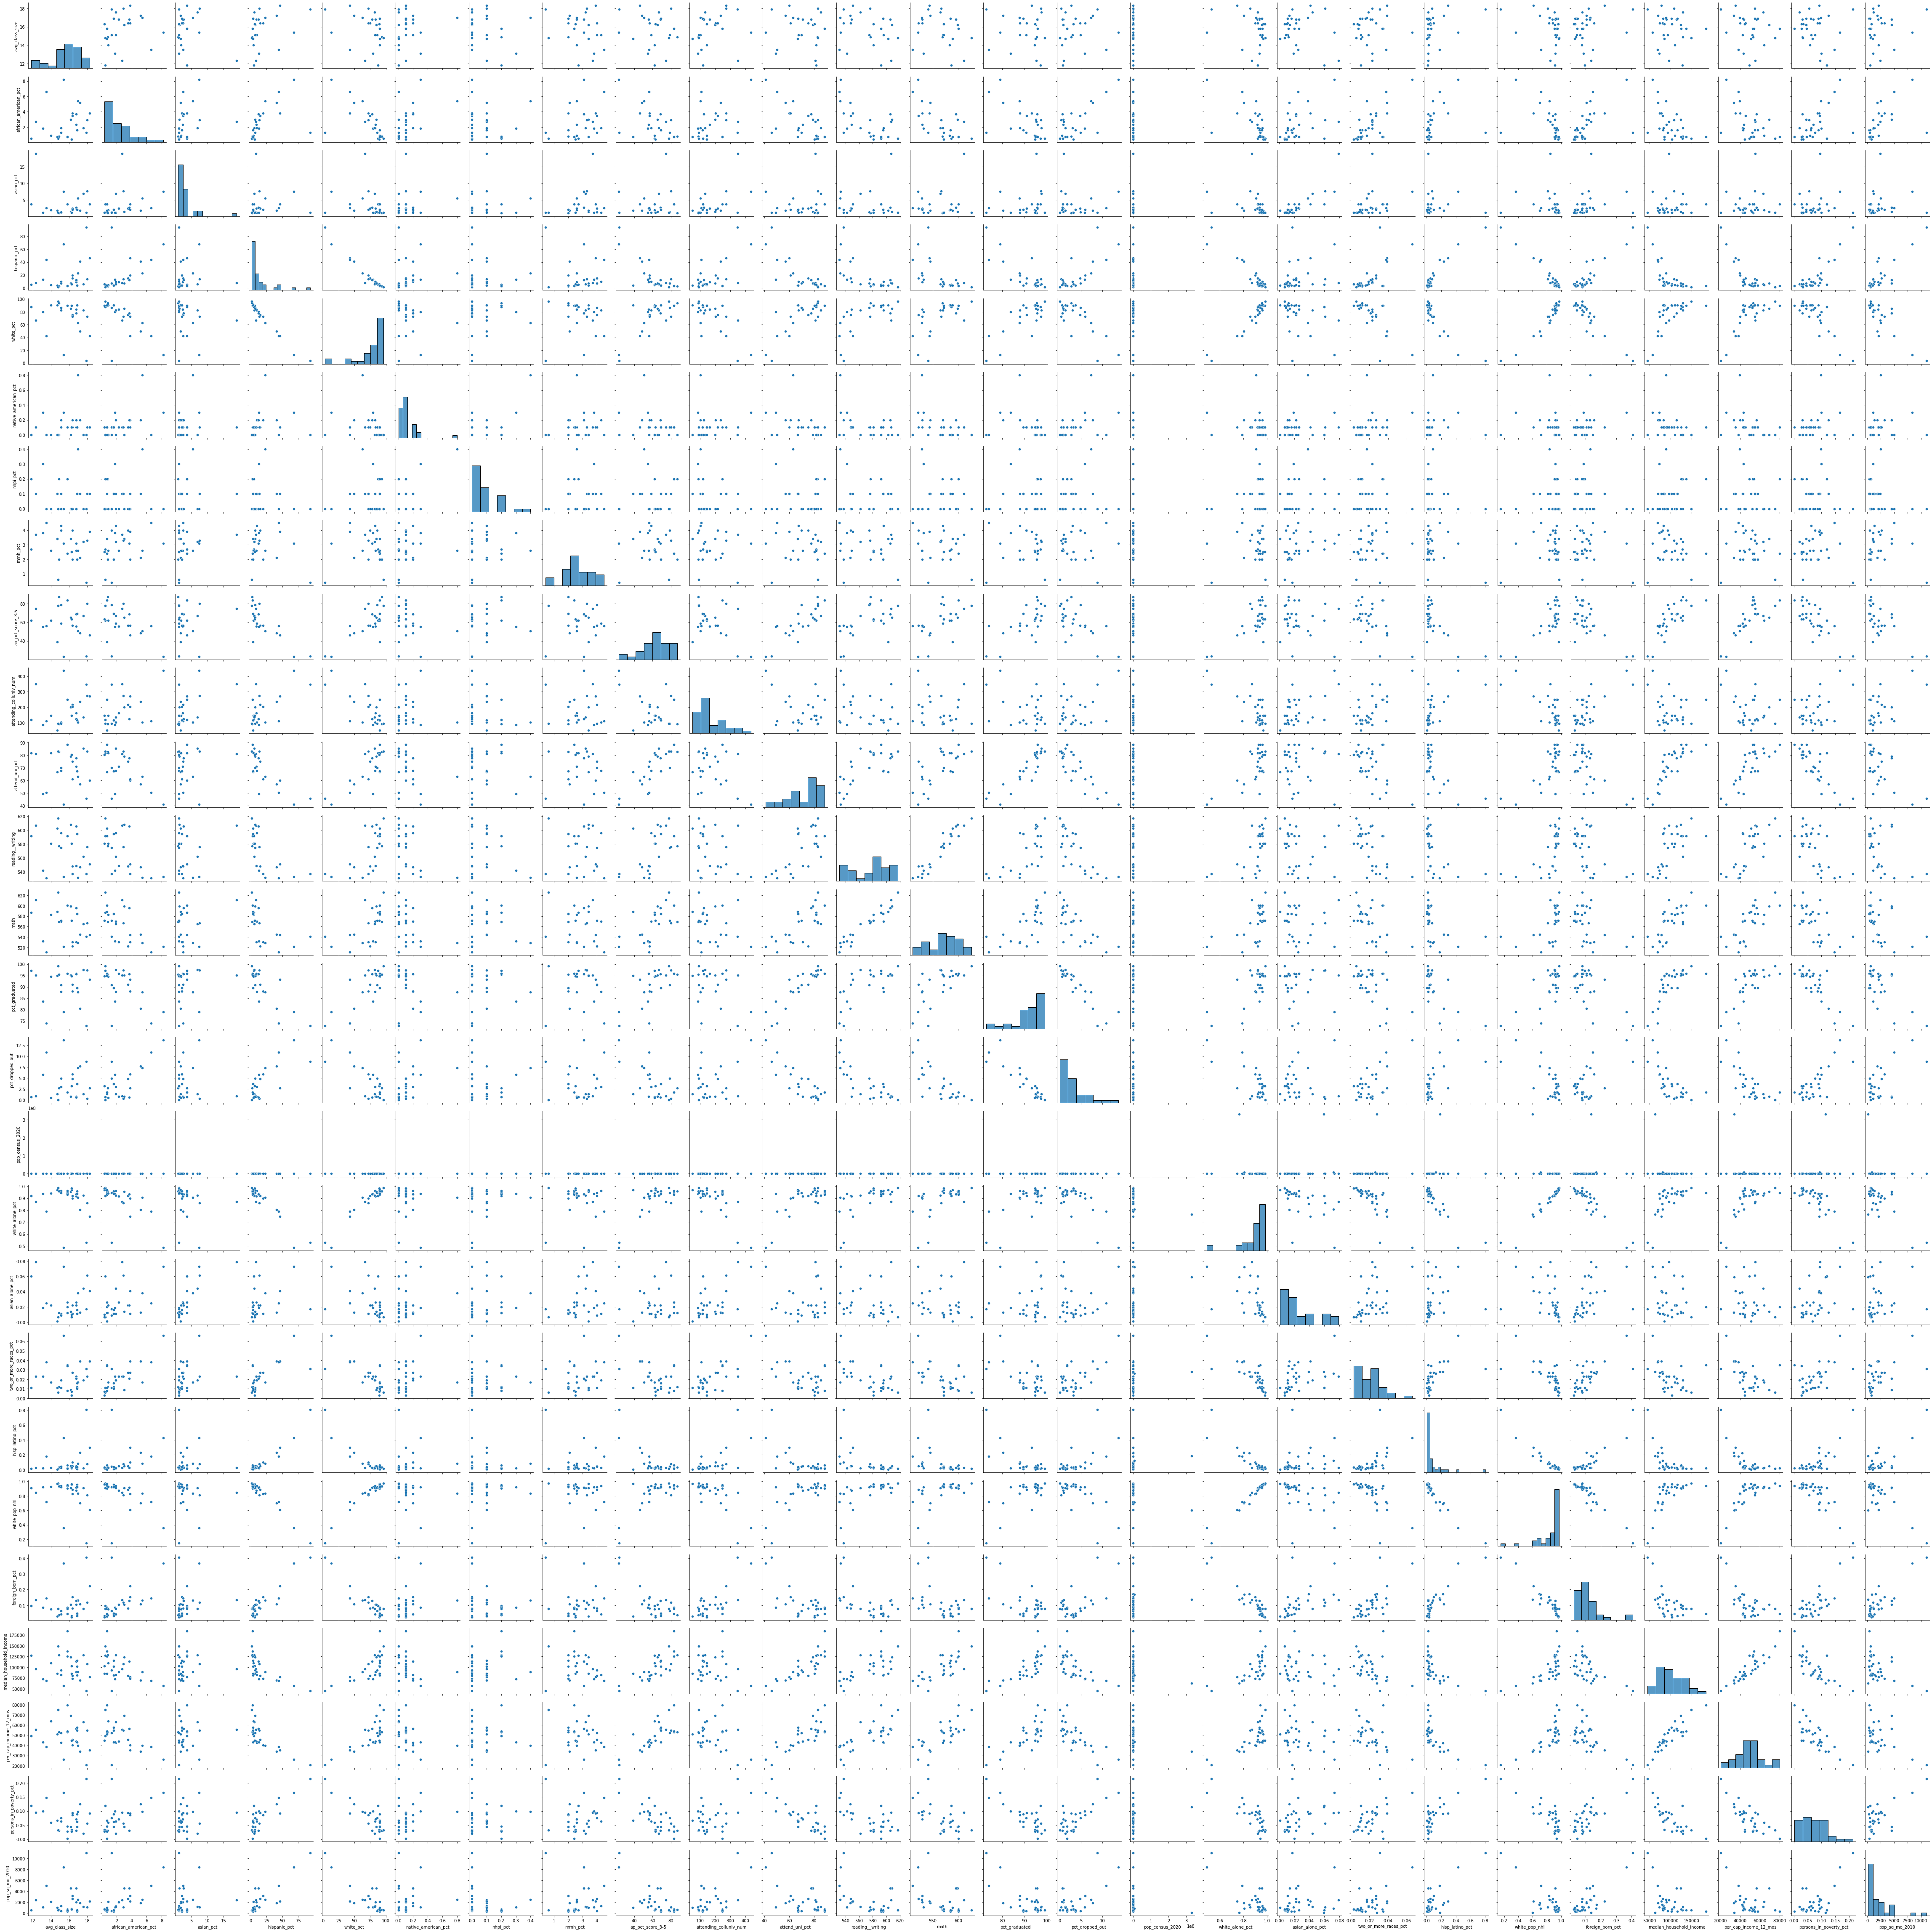

In [33]:
plt = sns.pairplot(df_subset2)

In [30]:
# plt.savefig('subset2.png')

2nd Dataset

In [31]:
df2.corr().describe()

,distance,distance_mi,loc1,lat1,lon1,loc2,lat2,lon2,district_code_x,district_code_y,avg_class_size_x,avg_class_size_y,african_american_pct_x,asian_pct_x,hispanic_pct_x,white_pct_x,native_american_pct_x,nhpi_pct_x,mrnh_pct_x,african_american_pct_y,asian_pct_y,hispanic_pct_y,white_pct_y,native_american_pct_y,nhpi_pct_y,mrnh_pct_y,ap_pct_score_3-5_x,ap_pct_score_3-5_y,attend_uni_(pct)_x,attend_uni_(pct)_y,private_four-year_(pct)_x,private_four-year_(pct)_y,pct_graduated_x,pct_graduated_y,pct_dropped_out_x,pct_dropped_out_y,pop_census_2020_x,pop_census_2020_y,hisp_latino_pct_x,hisp_latino_pct_y,white_pop_nhl_x,white_pop_nhl_y,foreign_born_pct_x,foreign_born_pct_y,median_household_income_x,median_household_income_y,per_cap_income_12_mos_x,per_cap_income_12_mos_y,pop_sq_mo_2010_x,pop_sq_mo_2010_y,median_household_income_gap,district_whiteness_gap,district_latinx_gap,census_whiteness_gap,census_latinx_gap,ap_gap,graduation_gap,uni_attendance_gap,foreign_born_gap
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.032503,0.032503,0.020638,-0.023712,-0.016971,0.026809,-0.016814,-0.030727,0.014460,0.006924,0.015639,0.014652,0.029004,0.014682,0.046896,-0.047398,0.020737,0.002923,-0.027366,0.024833,0.027782,0.050670,-0.053292,0.015755,0.019558,-0.017747,-0.033726,-0.025824,-0.023885,-0.025227,-0.023146,-0.017696,-0.020673,-0.031414,0.032143,0.033396,0.039889,0.038777,0.048646,0.051225,-0.051875,-0.054411,0.055886,0.055780,-0.010185,-0.005371,-0.023521,-0.015827,0.044896,0.047035,0.078197,0.100922,0.096167,0.095244,0.086155,0.091171,0.070563,0.088353,0.091615
std,0.202251,0.202251,0.156227,0.192584,0.231052,0.150919,0.174118,0.259173,0.217466,0.237608,0.212681,0.212224,0.358902,0.180126,0.474496,0.468228,0.225702,0.191995,0.192878,0.308201,0.169093,0.476670,0.471852,0.205128,0.179943,0.195524,0.390595,0.414155,0.422157,0.428143,0.394252,0.398387,0.422068,0.422621,0.421014,0.400013,0.459337,0.454605,0.452255,0.456538,0.463041,0.464666,0.438731,0.441395,0.399337,0.401844,0.413213,0.414267,0.424573,0.417768,0.231988,0.444297,0.469151,0.469722,0.469640,0.305406,0.364076,0.314964,0.432736
min,-0.208929,-0.208929,-0.237072,-0.509331,-0.471726,-0.226843,-0.473448,-0.592287,-0.419715,-0.447741,-0.535782,-0.592287,-0.724368,-0.471726,-0.975690,-0.974429,-0.395577,-0.357860,-0.419715,-0.582340,-0.429160,-0.981281,-0.981281,-0.304178,-0.318317,-0.447741,-0.750526,-0.791185,-0.867428,-0.843610,-0.762175,-0.773318,-0.908539,-0.912220,-0.908539,-0.912220,-0.908941,-0.913037,-0.976537,-0.982039,-0.976537,-0.982039,-0.952530,-0.955569,-0.746900,-0.746788,-0.802634,-0.771169,-0.873809,-0.841259,-0.281306,-0.567589,-0.622959,-0.636105,-0.668006,-0.374585,-0.504964,-0.342109,-0.568907
25%,-0.060736,-0.060736,-0.028965,-0.074958,-0.127019,-0.030245,-0.060254,-0.123227,-0.053011,-0.116873,-0.050760,-0.049216,-0.044728,-0.023858,-0.040735,-0.282738,-0.066760,-0.081750,-0.133709,-0.037720,-0.028257,-0.047663,-0.295185,-0.052114,-0.058596,-0.094365,-0.237406,-0.213907,-0.239041,-0.230209,-0.250439,-0.176255,-0.208208,-0.197753,-0.041407,-0.051085,-0.065669,-0.054811,-0.041003,-0.048050,-0.296629,-0.332268,-0.064152,-0.055691,-0.189442,-0.171619,-0.239919,-0.206124,-0.042386,-0.061921,-0.060509,-0.323585,-0.350624,-0.361972,-0.342863,-0.160683,-0.273036,-0.180659,-0.331899
50%,0.003501,0.003501,0.003849,-0.010438,-0.038344,0.001118,-0.012741,-0.019171,-0.023839,-0.008349,0.020350,-0.009823,0.018946,-0.002563,0.017639,-0.013

In [32]:
# correlation matrix
df2.corr().round(2)

,distance,distance_mi,loc1,lat1,lon1,loc2,lat2,lon2,district_code_x,district_code_y,avg_class_size_x,avg_class_size_y,african_american_pct_x,asian_pct_x,hispanic_pct_x,white_pct_x,native_american_pct_x,nhpi_pct_x,mrnh_pct_x,african_american_pct_y,asian_pct_y,hispanic_pct_y,white_pct_y,native_american_pct_y,nhpi_pct_y,mrnh_pct_y,ap_pct_score_3-5_x,ap_pct_score_3-5_y,attend_uni_(pct)_x,attend_uni_(pct)_y,private_four-year_(pct)_x,private_four-year_(pct)_y,pct_graduated_x,pct_graduated_y,pct_dropped_out_x,pct_dropped_out_y,pop_census_2020_x,pop_census_2020_y,hisp_latino_pct_x,hisp_latino_pct_y,white_pop_nhl_x,white_pop_nhl_y,foreign_born_pct_x,foreign_born_pct_y,median_household_income_x,median_household_income_y,per_cap_income_12_mos_x,per_cap_income_12_mos_y,pop_sq_mo_2010_x,pop_sq_mo_2010_y,median_household_income_gap,district_whiteness_gap,district_latinx_gap,census_whiteness_gap,census_latinx_gap,ap_gap,graduation_gap,uni_attendance_gap,foreign_born_gap
distance,1.00,1.00,0.02,0.09,0.16,-0.01,0.14,-0.03,-0.05,-0.13,-0.07,0.02,-0.05,-0.04,-0.03,0.04,0.08,0.11,0.03,0.08,0.03,0.11,-0.12,0.08,0.05,0.10,-0.10,-0.21,-0.07,-0.16,0.00,-0.12,-0.00,-0.11,-0.04,0.08,-0.07,0.11,-0.04,0.09,0.06,-0.09,-0.07,0.07,-0.06,-0.17,0.01,-0.11,-0.04,0.06,-0.12,0.11,0.07,0.10,0.07,0.00,-0.02,-0.02,0.12
distance_mi,1.00,1.00,0.02,0.09,0.16,-0.01,0.14,-0.03,-0.05,-0.13,-0.07,0.02,-0.05,-0.04,-0.03,0.04,0.08,0.11,0.03,0.08,0.03,0.11,-0.12,0.08,0.05,0.10,-0.10,-0.21,-0.07,-0.16,0.00,-0.12,-0.00,-0.11,-0.04,0.08,-0.07,0.11,-0.04,0.09,0.06,-0.09,-0.07,0.07,-0.06,-0.17,0.01,-0.11,-0.04,0.06,-0.12,0.11,0.07,0.10,0.07,0.00,-0.02,-0.02,0.12
loc1,0.02,0.02,1.00,-0.24,0.18,-0.04,0.00,0.01,0.44,0.02,0.10,-0.07,0.09,-0.22,0.01,0.02,0.09,0.08,-0.08,0.04,0.08,0.00,-0.02,0.01,0.01,0.07,-0.14,0.01,-0.04,-0.04,0.03,0.01,-0.00,-0.03,0.03,0.05,-0.05,0.00,-0.03,-0.01,0.03,-0.01,0.00,0.01,0.04,-0.04,-0.01,-0.02,0.03,0.01,-0.10,-0.01,-0.02,-0.03,-0.03,-0.03,-0.01,-0.03,-0.02
lat1,0.09,0.09,-0.24,1.00,-0.15,-0.02,-0.04,-0.00,0.04,-0.02,-0.04,0.03,-0.51,-0.18,-0.18,0.25,-0.32,0.01,-0.11,0.04,0.04,-0.01,0.00,-0.01,-0.06,0.03,0.19,0.03,0.19,0.02,0.02,0.02,0.10,0.02,-0.28,0.04,-0.22,0.01,-0.07,-0.02,0.16,0.01,-0.35,-0.01,0.01,-0.00,0.03,0.01,-0.40,-0.02,-0.09,-0.08,-0.06,-0.05,-0.03,-0.03,-0.09,-0.12,-0.06
lon1,0.16,0.16,0.18,-0.15,1.00,-0.04,0.02,-0.04,0.18,-0.02,-0.40,0.03,-0.29,-0.47,-0.38,0.45,-0.12,0.10,0.19,0.04,0.02,0.06,-0.06,-0.01,-0.04,0.02,-0.07,-0.04,-0.05,-0.04,0.27,-0.06,0.14,-0.04,-0.13,0.02,-0.32,0.06,-0.41,0.05,0.44,-0.06,-0.39,0.05,0.11,-0.04,0.27,-0.02,-0.27,0.04,-0.04,-0.16,-0.18,-0.17,-0.19,-0.07,-0.07,-0.06,-0.14
loc2,-0.01,-0.01,-0.04,-0.02,-0.04,1.00,-0.23,-0.04,-0.04,0.36,0.03,0.13,-0.03,-0.02,-0.00,0.01,0.02,0.00,-0.03,0.22,0.01,0.05,-0.07,0.19,0.12,-0.05,0.03,-0.03,0.04,-0.05,0.00,0.02,0.02,-0.03,-0.04,0.08,-0.01,-0.02,0.01,-0.01,0.00,-0.02,0.01,0.08,0.03,-0.01,0.01,-0.03,0.01,0.05,-0.04,0.01,0.02,-0.02,-0.01,-0.07,0.06,0.02,-0.04
lat2,0.14,0.14,0.00,-0.04,0.02,-0.23,1.00,-0.27,0.01,0.07,-0.03,0.04,-0.00,-0.02,0.02,-0.02,0.04,0.06,-0.03,-0.47,-0.16,-0.03,0.09,-0.28,0.01,-0.05,-0.04,0.08,-0.03,0.07,-0.01,-0.08,-0.02,0.03,-0.02,-0.18,0.01,-0.10,0.02,0.06,-0.02,0.00,0.03,-0.20,-0.01,-0.10,-0.02,-0.12,0.05,-0.31,-0.08,-0.01,0.01,0.03,0.06,0.01,-0.07,-0.08,0.04
lon2,-0.03,-0.03,0.01,-0.00,-0.04,-0.04,-0.27,1.00,0.01,0.18,-0.01,-0.59,-0.02,0.02,-0.03,0.02,0.02,0.05,-0.03,-0.25,-0.43,-0.48,0.53,-0.09,-0.01,0.09,0.04,0.13,0.03,0.08,0.04,0.30,0.03,0.15,-0.01,-0.13,-0.03,-0.42,-0.02,-0.49,0.02,0.52,-0.02,-0.46,0.04,0.23,0.02,0.39,-0.02,-0.26,0.02,-0.24,-0.27,-0.28,-0.31,-0.12,-0.09,-0.04,-0.23
district_code_x,-0.05,-0.05,0.44,0.04,0.18,-0.04,0.01,0.01,1.00,-0.04,-0.05,-0.01,-0.34,-0.24,-0.25,0.32,-0.14,0.10,-0.42,0.01,0.03,0.05,-0.05,-0.02,-0.03,-0.00,0.22,-0.01,0.29,-0.05,0.19,-0.03,0.27,-0.05,-0.21,0.06,-0.35,0.04,-0.19,0.06,0.24,-0.06,-0.23,0.05,0.46,-0.06,0.25,-0.03,-0.29,0.04,0.09,-0.03,-0.05,-0.05,-0.06,-0.01,-0.04,-0.02,-0.03
district_code_y,-0.13,-0.13

In [33]:
# plt = sns.pairplot(df2)

### Plots (exploratory)

Remember, always plot your distributions. You may want to try some histograms on particular columns. 

Scatter plots could also help with understanding how variables relate to one another. 

Feel free to use any plot type you think will help you better understand the data. If you think you've got a takeaway or a question, you can put that takeaway or question in a markdown cell above or below the chart. Just to remind yourself and anyone you're asking for help from, the purpose of that plot. I also like to get into the habit of titling plots [DRAFT]-NOT FOR PUBLICATION since exploratory data viz can be misleading but you might pass them around to editors or colleagues as you try to understand the data.

/Users/sm/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


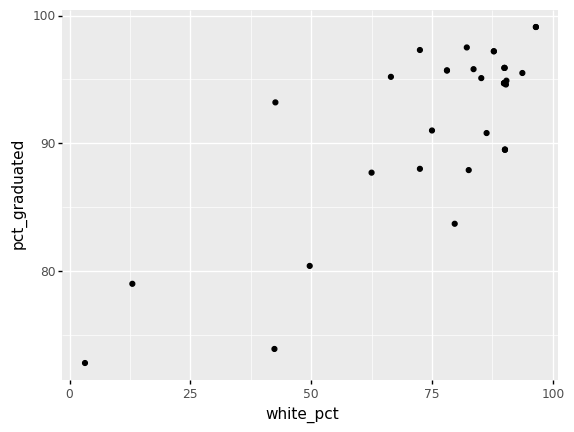

<ggplot: (393669590)>

In [34]:
# Is there a correlation between race(white percentage) and graduation rate?
(
    ggplot(df_subset, aes(x='white_pct', y='pct_graduated')) + geom_point()
)

/Users/sm/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


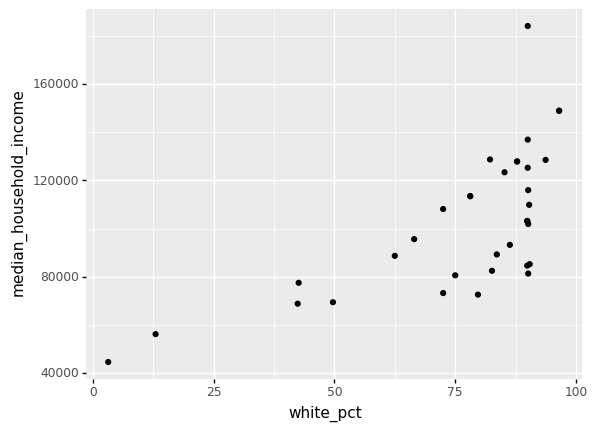

<ggplot: (393760252)>

In [35]:
# Is there a correlation between race(white percentage) and attending university?
(
    ggplot(df_subset, aes(x='white_pct', y='median_household_income')) + geom_point()
)

/Users/sm/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


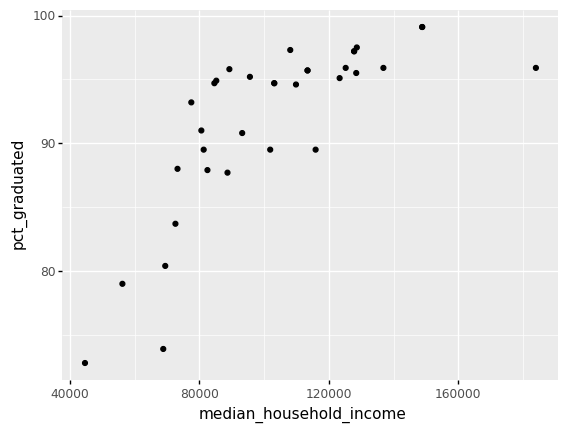

<ggplot: (393795128)>

In [36]:
# Is there a correlation between median income and graduation?
(
    ggplot(df_subset, aes(x='median_household_income', y='pct_graduated')) + geom_point()
)

/Users/sm/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


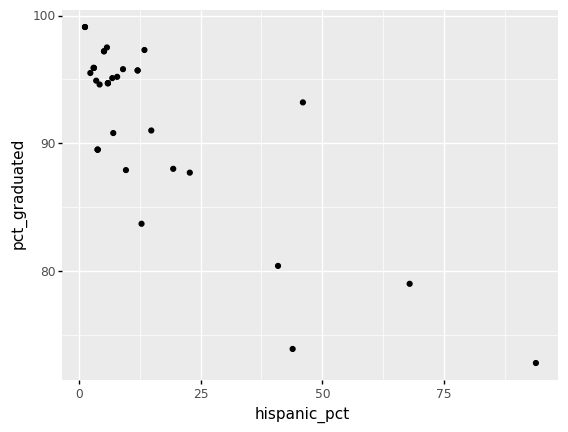

<ggplot: (393829791)>

In [37]:
# Is there a correlation between hispanic percentage of school population and graduation?
(
    ggplot(df_subset, aes(x='hispanic_pct', y='pct_graduated')) + geom_point()
)

/Users/sm/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


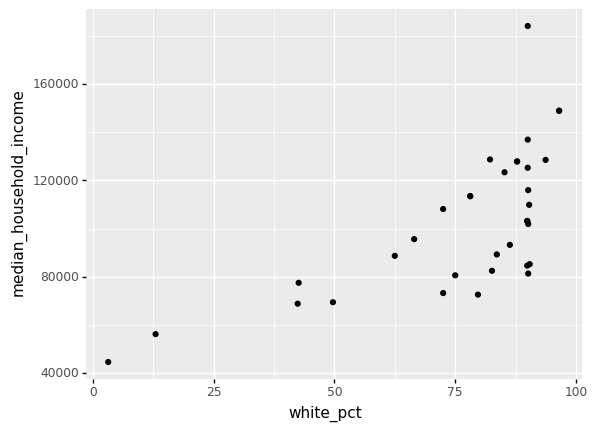

<ggplot: (393864406)>

In [38]:
# Is there a correlation between the percentage of white people to median household income across towns?
(
    ggplot(df_subset, aes(x='white_pct', y='median_household_income')) + geom_point()
)

### Regressions and Models (exploratory)

This is where you start using some of the more advanced statsitical techniques you've learned so far to understand the data better. Wondering if the differences between two means is significant? You want to try a t-test. Alternatively, this is a good place to play around with regressions to better understand how variables in your dataset relate to one another. You might want to put the takeaway from the regression model in the cell below, just so you don't forget what exploration you did and what it means.

In [39]:
# import statsmodels.formula.api as smf
# model = smf.ols("Y ~ X1 + X2 + X3", data=df)
# results = model.fit()
# results.summary()


In [40]:
# Percentage of White Students --> Percentage of Students graduating?
import statsmodels.formula.api as smf

model = smf.ols("pct_graduated ~ white_pct", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_graduated   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     49.47
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           5.66e-08
Time:                        07:50:23   Log-Likelihood:                -96.845
No. Observations:                  34   AIC:                             197.7
Df Residuals:                      32   BIC:                             200.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.6078      2.679     27.473      0.000      68.150      79.065
white_pct      0.2361      0.034      7.034      0.000       0.168       0.304
==============================================================================
Omnibus:                        0.855   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.652   Jarque-Bera (JB):                0.461
Skew:                          -0.285   Prob(JB):                        0.794
Kurtosis:                       3.011   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Percentage of White Students --> Percentage of Students attending university?
import statsmodels.formula.api as smf

model = smf.ols("attend_uni_pct ~ white_pct", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attend_uni_pct   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     43.29
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           2.05e-07
Time:                        07:50:23   Log-Likelihood:                -120.05
No. Observations:                  34   AIC:                             244.1
Df Residuals:                      32   BIC:                             247.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.8455      5.302      7.327      0.000      28.046      49.645
white_pct      0.4371      0.066      6.580      0.000       0.302       0.572
==============================================================================
Omnibus:                        4.197   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                2.927
Skew:                          -0.689   Prob(JB):                        0.231
Kurtosis:                       3.408   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Median Household Income --> Percentage of Students graduating?
import statsmodels.formula.api as smf

model = smf.ols("pct_graduated ~ median_household_income", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_graduated   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     41.92
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           2.77e-07
Time:                        07:50:23   Log-Likelihood:                -98.498
No. Observations:                  34   AIC:                             201.0
Df Residuals:                      32   BIC:                             204.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  74.0052      2.844     26.020      0.000      68.212      79.799
median_household_income     0.0002   2.66e-05      6.475      0.000       0.000       0.000
==============================================================================
Omnibus:                        6.418   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                4.980
Skew:                          -0.889   Prob(JB):                       0.0829
Kurtosis:                       3.595   Cond. No.                     3.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# Median Household Income --> Percentage of Students attending university?
import statsmodels.formula.api as smf

model = smf.ols("attend_uni_pct ~ median_household_income", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attend_uni_pct   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     70.17
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.43e-09
Time:                        07:50:23   Log-Likelihood:                -114.86
No. Observations:                  34   AIC:                             233.7
Df Residuals:                      32   BIC:                             236.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  35.2869      4.602      7.668      0.000      25.913      44.661
median_household_income     0.0004   4.31e-05      8.377      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.376   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.537
Skew:                          -0.172   Prob(JB):                        0.765
Kurtosis:                       2.490   Cond. No.                     3.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# Percentage of Latino students --> Percentage of Students graduating?
import statsmodels.formula.api as smf

model = smf.ols("pct_graduated ~ hispanic_pct", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_graduated   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     57.20
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.29e-08
Time:                        07:50:23   Log-Likelihood:                -95.304
No. Observations:                  34   AIC:                             194.6
Df Residuals:                      32   BIC:                             197.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       95.6729      0.878    108.996      0.000      93.885      97.461
hispanic_pct    -0.2638      0.035     -7.563      0.000      -0.335      -0.193
==============================================================================
Omnibus:                        2.806   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.246   Jarque-Bera (JB):                1.635
Skew:                          -0.482   Prob(JB):                        0.442
Kurtosis:                       3.473   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Foreign Born Population --> Percentage of Students graduating?

import statsmodels.formula.api as smf

model = smf.ols("pct_graduated ~ foreign_born_pct", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_graduated   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     16.64
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           0.000280
Time:                        07:50:23   Log-Likelihood:                -105.61
No. Observations:                  34   AIC:                             215.2
Df Residuals:                      32   BIC:                             218.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           96.5611      1.523     63.409      0.000      93.459      99.663
foreign_born_pct   -46.8462     11.483     -4.080      0.000     -70.236     -23.456
==============================================================================
Omnibus:                        6.274   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.960
Skew:                          -0.906   Prob(JB):                       0.0837
Kurtosis:                       3.464   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Population Density (Population per Square Mile in 2010 Census) --> Percentage of Students graduating?
import statsmodels.formula.api as smf

model = smf.ols("pct_graduated ~ pop_sq_mo_2010", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_graduated   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     22.57
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           4.10e-05
Time:                        07:50:23   Log-Likelihood:                -103.66
No. Observations:                  34   AIC:                             211.3
Df Residuals:                      32   BIC:                             214.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         95.4944      1.202     79.469      0.000      93.047      97.942
pop_sq_mo_2010    -0.0018      0.000     -4.750      0.000      -0.003      -0.001
==============================================================================
Omnibus:                        3.459   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                2.530
Skew:                          -0.664   Prob(JB):                        0.282
Kurtosis:                       3.145   Cond. No.                     4.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# Percentage of white students --> Median Household Income?
import statsmodels.formula.api as smf

model = smf.ols("median_household_income ~ white_pct", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     median_household_income   R-squared:                       0.456
Model:                                 OLS   Adj. R-squared:                  0.439
Method:                      Least Squares   F-statistic:                     26.81
Date:                     Tue, 01 Mar 2022   Prob (F-statistic):           1.19e-05
Time:                             07:50:23   Log-Likelihood:                -387.35
No. Observations:                       34   AIC:                             778.7
Df Residuals:                           32   BIC:                             781.8
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.419e+04   1.38e+04      2.484      0.018    6147.717    6.22e+04
white_pct    892.9530    172.465      5.178      0.000     541.653    1244.253
==============================================================================
Omnibus:                        6.278   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.856
Skew:                           0.688   Prob(JB):                       0.0882
Kurtosis:                       4.239   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Percentage of Students that Graduated --> Percentage of Students that went on to attend university? 
import statsmodels.formula.api as smf

model = smf.ols("attend_uni_pct ~ pct_graduated", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attend_uni_pct   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     128.5
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           9.68e-13
Time:                        07:50:23   Log-Likelihood:                -107.18
No. Observations:                  34   AIC:                             218.4
Df Residuals:                      32   BIC:                             221.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -83.7464     13.809     -6.065      0.000    -111.874     -55.619
pct_graduated     1.7021      0.150     11.336      0.000       1.396       2.008
==============================================================================
Omnibus:                        3.521   Durbin-Watson:                   2.620
Prob(Omnibus):                  0.172   Jarque-Bera (JB):                2.521
Skew:                          -0.659   Prob(JB):                        0.284
Kurtosis:                       3.200   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# Median Household Income + Percentage of White Students --> Percentage of Students that graduated?
import statsmodels.formula.api as smf

model = smf.ols("pct_graduated ~ white_pct + median_household_income", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_graduated   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     36.49
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           7.13e-09
Time:                        07:50:23   Log-Likelihood:                -92.157
No. Observations:                  34   AIC:                             190.3
Df Residuals:                      31   BIC:                             194.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  70.3413      2.590     27.158      0.000      65.059      75.624
white_pct                   0.1508      0.040      3.744      0.001       0.069       0.233
median_household_income  9.555e-05   3.05e-05      3.137      0.004    3.34e-05       0.000
==============================================================================
Omnibus:                        1.355   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                0.463
Skew:                          -0.146   Prob(JB):                        0.793
Kurtosis:                       3.491   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# Median Household Income + Percentage of White Students --> Percentage of Students attending university?
import statsmodels.formula.api as smf

model = smf.ols("attend_uni_pct ~ white_pct + median_household_income", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attend_uni_pct   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     48.92
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           2.57e-10
Time:                        07:50:23   Log-Likelihood:                -110.38
No. Observations:                  34   AIC:                             226.8
Df Residuals:                      31   BIC:                             231.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  30.1719      4.426      6.816      0.000      21.144      39.200
white_pct                   0.2105      0.069      3.058      0.005       0.070       0.351
median_household_income     0.0003    5.2e-05      4.874      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.636   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.727   Jarque-Bera (JB):                0.283
Skew:                          -0.223   Prob(JB):                        0.868
Kurtosis:                       3.018   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
# Median Household Income --> Percentage of Students attending university? 
# how does this compare to when adding in the percentage of white students (0.759)?

import statsmodels.formula.api as smf

model = smf.ols("attend_uni_pct ~ median_household_income", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attend_uni_pct   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     70.17
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.43e-09
Time:                        07:50:23   Log-Likelihood:                -114.86
No. Observations:                  34   AIC:                             233.7
Df Residuals:                      32   BIC:                             236.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  35.2869      4.602      7.668      0.000      25.913      44.661
median_household_income     0.0004   4.31e-05      8.377      0.000       0.000       0.000
==============================================================================
Omnibus:                        0.376   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.829   Jarque-Bera (JB):                0.537
Skew:                          -0.172   Prob(JB):                        0.765
Kurtosis:                       2.490   Cond. No.                     3.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
# Median Household Income + Percentage of Latino Students --> Percentage of Students attending university?
import statsmodels.formula.api as smf

model = smf.ols("pct_graduated ~ hispanic_pct +  median_household_income", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_graduated   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     41.41
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.76e-09
Time:                        07:50:23   Log-Likelihood:                -90.622
No. Observations:                  34   AIC:                             187.2
Df Residuals:                      31   BIC:                             191.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  85.0959      3.462     24.578      0.000      78.035      92.157
hispanic_pct               -0.1771      0.041     -4.274      0.000      -0.262      -0.093
median_household_income  9.036e-05   2.88e-05      3.135      0.004    3.16e-05       0.000
==============================================================================
Omnibus:                        3.408   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.182   Jarque-Bera (JB):                2.228
Skew:                          -0.307   Prob(JB):                        0.328
Kurtosis:                       4.094   Cond. No.                     5.92e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# Average Class Size --> Percentage of Students that graduated?
import statsmodels.formula.api as smf

model = smf.ols("pct_graduated ~ avg_class_size", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          pct_graduated   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.3238
Date:                Tue, 01 Mar 2022   Prob (F-statistic):              0.573
Time:                        07:50:23   Log-Likelihood:                -112.56
No. Observations:                  34   AIC:                             229.1
Df Residuals:                      32   BIC:                             232.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         97.9776     11.054      8.864      0.000      75.462     120.493
avg_class_size    -0.3984      0.700     -0.569      0.573      -1.825       1.028
==============================================================================
Omnibus:                       14.470   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.963
Skew:                          -1.471   Prob(JB):                     0.000564
Kurtosis:                       4.381   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Median Household Income + Percentage of White Students --> Statewide Math scores?
import statsmodels.formula.api as smf

model = smf.ols("math ~ white_pct + median_household_income", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   math   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     21.80
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.22e-06
Time:                        07:50:23   Log-Likelihood:                -149.43
No. Observations:                  34   AIC:                             304.9
Df Residuals:                      31   BIC:                             309.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 483.7317     13.959     34.654      0.000     455.262     512.201
white_pct                   0.2933      0.217      1.351      0.186      -0.149       0.736
median_household_income     0.0006      0.000      3.856      0.001       0.000       0.001
==============================================================================
Omnibus:                        0.118   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.943   Jarque-Bera (JB):                0.335
Skew:                          -0.029   Prob(JB):                        0.846
Kurtosis:                       2.518   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# Median Household Income + Percentage of White Students --> Statewide Reading/Writing scores?
import statsmodels.formula.api as smf

model = smf.ols("reading__writing ~ white_pct + median_household_income", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       reading__writing   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     18.50
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           5.14e-06
Time:                        07:50:59   Log-Likelihood:                -146.31
No. Observations:                  34   AIC:                             298.6
Df Residuals:                      31   BIC:                             303.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 502.2901     12.735     39.442      0.000     476.317     528.263
white_pct                   0.4968      0.198      2.508      0.018       0.093       0.901
median_household_income     0.0004      0.000      2.395      0.023    5.32e-05       0.001
==============================================================================
Omnibus:                        1.276   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.941
Skew:                          -0.044   Prob(JB):                        0.625
Kurtosis:                       2.190   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
# trying to see how to get the highest r-squared based on the current variables 
# Median Household Income + Percentage of White Students + reading/writing scores+ math scores + average class size --> Percentage of Students attending university?
import statsmodels.formula.api as smf

model = smf.ols("attend_uni_pct ~  white_pct + median_household_income + reading__writing + math + avg_class_size", data=df_subset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         attend_uni_pct   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     19.39
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           2.53e-08
Time:                        07:55:05   Log-Likelihood:                -109.17
No. Observations:                  34   AIC:                             230.3
Df Residuals:                      28   BIC:                             239.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -9.6564     35.732     -0.270      0.789     -82.850      63.537
white_pct                   0.2097      0.084      2.487      0.019       0.037       0.382
median_household_income     0.0002   7.16e-05      2.893      0.007    6.04e-05       0.000
reading__writing           -0.0387      0.175     -0.221      0.827      -0.398       0.321
math                        0.0993      0.160      0.621      0.540      -0.229       0.427
avg_class_size              0.6549      0.699      0.937      0.357      -0.777       2.087
==============================================================================
Omnibus:                        0.141   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.932   Jarque-Bera (JB):                0.256
Skew:                          -0.136   Prob(JB):                        0.880
Kurtosis:                       2.674   Cond. No.                     3.36e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

----

In [59]:
df2

,school_to_school,distance,distance_mi,town_1,town_2,loc1,lat1,lon1,loc2,lat2,lon2,district_code_x,district_name_x,district_code_y,district_name_y,avg_class_size_x,avg_class_size_y,african_american_pct_x,asian_pct_x,hispanic_pct_x,white_pct_x,native_american_pct_x,nhpi_pct_x,mrnh_pct_x,african_american_pct_y,asian_pct_y,hispanic_pct_y,white_pct_y,native_american_pct_y,nhpi_pct_y,mrnh_pct_y,ap_pct_score_3-5_x,ap_pct_score_3-5_y,attend_uni_(pct)_x,attend_uni_(pct)_y,private_four-year_(pct)_x,private_four-year_(pct)_y,pct_graduated_x,pct_graduated_y,pct_dropped_out_x,pct_dropped_out_y,school_name_x,school_name_y,pop_census_2020_x,pop_census_2020_y,hisp_latino_pct_x,hisp_latino_pct_y,white_pop_nhl_x,white_pop_nhl_y,foreign_born_pct_x,foreign_born_pct_y,median_household_income_x,median_household_income_y,per_cap_income_12_mos_x,per_cap_income_12_mos_y,pop_sq_mo_2010_x,pop_sq_mo_2010_y,median_household_income_gap,district_whiteness_gap,district_latinx_gap,census_whiteness_gap,census_latinx_gap,ap_gap,graduation_gap,uni_attendance_gap,foreign_born_gap
0,Swampscott-Lynn,1.924864,1.196055,Swampscott,Lynn,31,42.479062,-70.920438,14,42.476687,-70.943687,2910000.0,Swampscott,1630000.0,Lynn,16.8,15.4,3.7,2.7,12.1,78.1,0.2,0.0,3.1,8.2,7.5,67.9,13.0,0.3,0.0,3.1,68.8,23.3,77.5,41.1,37.1,27.8,95.7,79.0,0.6,13.7,Swampscott High School,Lynn Classical High School + Lynn English High...,15111,101253,0.025,0.428,0.917,0.359,0.129,0.367,113407,56181,56405,26291,4560.1,8409.5,57226,65.1,55.8,55.8,40.3,45.5,16.7,36.4,23.8
1,Lawrence-North Andover,2.551754,1.585587,Lawrence,North Andover,13,42.691187,-71.145062,24,42.700563,-71.116563,1490000.0,Lawrence,2110000.0,North Andover,17.9,18.0,1.3,1.2,93.8,3.2,0.0,0.0,0.4,2.9,7.6,13.5,72.5,0.1,0.1,3.3,23.8,80.0,45.7,83.0,19.6,48.4,72.8,97.3,8.8,0.3,Lawrence High School,North Andover High School,89143,30915,0.806,0.076,0.148,0.811,0.406,0.119,44613,108070,20858,54939,11028.0,1077.8,63457,69.3,80.3,66.3,73.0,56.2,24.5,37.3,28.7
2,Salem-Swampscott,3.116212,1.936325,Salem,Swampscott,28,42.506312,-70.911563,21,42.479062,-70.920438,2580000.0,Salem,2910000.0,Swampscott,13.5,16.8,6.6,2.6,43.9,42.4,0.0,0.0,4.5,3.7,2.7,12.1,78.1,0.2,0.0,3.1,56.1,68.8,50.2,77.5,27.3,37.1,73.9,95.7,10.9,0.6,Salem High School,Swampscott High School,44480,15111,0.178,0.025,0.718,0.917,0.146,0.129,68808,113407,38400,56405,4992.9,4560.1,44599,35.7,31.8,19.9,15.3,12.7,21.8,27.3,1.7
3,Marblehead-Salem,3.801214,2.361965,Marblehead,Salem,17,42.492438,-70.869187,28,42.506312,-70.911563,1680000.0,Marblehead,2580000.0,Salem,16.2,13.5,3.0,1.4,6.9,85.2,0.0,0.0,3.4,6.6,2.6,43.9,42.4,0.0,0.0,4.5,65.2,56.1,79.1,50.2,45.5,27.3,95.1,73.9,0.8,10.9,Marblehead High School,Salem High School,20441,44480,0.050,0.178,0.911,0.718,0.105,0.146,123333,68808,69148,38400,4515.5,4992.9,54525,42.8,37.0,19.3,12.8,9.1,21.2,28.9,4.1
4,Andover-Lawrence,3.874623,2.407579,Andover,Lawrence,2,42.657187,-71.155438,13,42.691187,-71.145062,90000.0,Andover,1490000.0,Lawrence,12.3,17.9,2.7,19.0,7.9,66.5,0.1,0.1,3.7,1.3,1.2,93.8,3.2,0.0,0.0,0.4,74.4,23.8,81.1,45.7,52.4,19.6,95.2,72.8,0.9,8.8,Andover High School,Lawrence High School,9735,89143,0.025,0.806,0.847,0.148,0.135,0.406,95600,44613,55457,20858,2376.6,11028.0,50987,63.3,85.9,69.9,78.1,50.6,22.4,35.4,27.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Rockport-Haverhill,43.316282,26.915490,Rockport,Haverhill,26,42.652187,-70.609562,11,42.787188,-71.106938,2520000.0,Rockport,1280000.0,Haverhill,14.7,17.2,0.7,1.8,3.6,90.4,0.0,0.1,3.4,5.2,1.8,40.9,49.7,0.2,0.1,2.1,38.8,48.4,66.7,56.9,48.0,28.5,94.9,80.4,1.3,7.7,Rockport High School,Haverhill High School,6992,67787,0.007,0.232,0.965,0.697,0.029,0.107,85208,69426,51122,33918,994.4,1846.5,15782,40.7,37.3,26.8,22.5,9.6,14.5,9.8,7.8
296,Saugus-Amesbury,43.884086,27

In [60]:
# for col in df2.columns:
#     print(col)

In [61]:
# distance between districts --> gap between the percentage of white students in the district?
import statsmodels.formula.api as smf

model = smf.ols("district_whiteness_gap ~ distance", data=df2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     district_whiteness_gap   R-squared:                       0.012
Model:                                OLS   Adj. R-squared:                  0.008
Method:                     Least Squares   F-statistic:                     3.480
Date:                    Tue, 01 Mar 2022   Prob (F-statistic):             0.0631
Time:                            07:50:59   Log-Likelihood:                -1376.6
No. Observations:                     300   AIC:                             2757.
Df Residuals:                         298   BIC:                             2765.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.5020      3.250      6.000      0.000      13.106      25.898
distance       0.2524      0.135      1.866      0.063      -0.014       0.519
==============================================================================
Omnibus:                       49.514   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.036
Skew:                           1.169   Prob(JB):                     6.19e-16
Kurtosis:                       3.367   Cond. No.                         56.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# distance between districts --> gap between school district's median household income?
import statsmodels.formula.api as smf

model = smf.ols("median_household_income_gap ~ distance", data=df2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     median_household_income_gap   R-squared:                       0.014
Model:                                     OLS   Adj. R-squared:                  0.010
Method:                          Least Squares   F-statistic:                     4.121
Date:                         Tue, 01 Mar 2022   Prob (F-statistic):             0.0432
Time:                                 07:50:59   Log-Likelihood:                -3437.2
No. Observations:                          300   AIC:                             6878.
Df Residuals:                              298   BIC:                             6886.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.747e+04   3124.915     11.990      0.000    3.13e+04    4.36e+04
distance    -264.0438    130.062     -2.030      0.043    -519.999      -8.088
==============================================================================
Omnibus:                       47.330   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.834
Skew:                           1.017   Prob(JB):                     3.07e-15
Kurtosis:                       4.098   Cond. No.                         56.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# gap between the percentage of white students in the district --> gap between school district's median household income?
import statsmodels.formula.api as smf

model = smf.ols("uni_attendance_gap ~ district_whiteness_gap + median_household_income_gap", data=df2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     uni_attendance_gap   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     176.6
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           2.95e-51
Time:                        08:01:59   Log-Likelihood:                -1035.5
No. Observations:                 300   AIC:                             2077.
Df Residuals:                     297   BIC:                             2088.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.5017      0.784      4.464      0.000       1.958       5.046
district_whiteness_gap          0.1924      0.021      9.347      0.000       0.152       0.233
median_household_income_gap     0.0002   2.14e-05     10.565      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.654   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.343
Skew:                           0.267   Prob(JB):                        0.114
Kurtosis:                       3.248   Cond. No.                     6.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
# gap between the percentage of graduating students in the district --> gap between the percentage of students attending university between two school districts?
import statsmodels.formula.api as smf

model = smf.ols("uni_attendance_gap ~ graduation_gap", data=df2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     uni_attendance_gap   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     426.7
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.86e-59
Time:                        08:04:05   Log-Likelihood:                -1019.7
No. Observations:                 300   AIC:                             2043.
Df Residuals:                     298   BIC:                             2051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.3817      0.644      8.356      0.000       4.114       6.649
graduation_gap     1.2692      0.061     20.657      0.000       1.148       1.390
==============================================================================
Omnibus:                        3.384   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                3.341
Skew:                           0.258   Prob(JB):                        0.188
Kurtosis:                       2.963   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# gap between the percentage of white students + incomes + test scores + graduation rates in the district --> gap between school district's university attendance percentage?
import statsmodels.formula.api as smf

model = smf.ols("uni_attendance_gap ~ district_whiteness_gap + median_household_income_gap + ap_gap + graduation_gap", data=df2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     uni_attendance_gap   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     183.6
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           9.22e-79
Time:                        08:05:16   Log-Likelihood:                -965.51
No. Observations:                 300   AIC:                             1941.
Df Residuals:                     295   BIC:                             1960.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.0010      0.665      1.506      0.133      -0.307       2.310
district_whiteness_gap         -0.0137      0.023     -0.586      0.559      -0.060       0.032
median_household_income_gap     0.0001   1.95e-05      6.064      0.000       8e-05       0.000
ap_gap                          0.1913      0.036      5.375      0.000       0.121       0.261
graduation_gap                  0.9473      0.074     12.826      0.000       0.802       1.093
==============================================================================
Omnibus:                        2.748   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                2.796
Skew:                           0.205   Prob(JB):                        0.247
Kurtosis:                       2.765   Cond. No.                     7.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
# gap between the percentage of students testing high on AP tests + graduation rates in the district --> gap between school district's university attendance percentage?
import statsmodels.formula.api as smf

model = smf.ols("uni_attendance_gap ~ ap_gap + graduation_gap", data=df2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     uni_attendance_gap   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     310.7
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.58e-73
Time:                        08:05:29   Log-Likelihood:                -983.66
No. Observations:                 300   AIC:                             1973.
Df Residuals:                     297   BIC:                             1984.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.2701      0.669      3.394      0.001       0.954       3.587
ap_gap             0.2618      0.029      8.978      0.000       0.204       0.319
graduation_gap     1.0538      0.060     17.675      0.000       0.936       1.171
==============================================================================
Omnibus:                        0.634   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.728   Jarque-Bera (JB):                0.666
Skew:                           0.110   Prob(JB):                        0.717
Kurtosis:                       2.930   Cond. No.                         44.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# gap between the percentage of students graduating in the district --> gap between school district's university attendance percentage?
import statsmodels.formula.api as smf

model = smf.ols("uni_attendance_gap ~ graduation_gap", data=df2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     uni_attendance_gap   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     426.7
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.86e-59
Time:                        08:08:11   Log-Likelihood:                -1019.7
No. Observations:                 300   AIC:                             2043.
Df Residuals:                     298   BIC:                             2051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.3817      0.644      8.356      0.000       4.114       6.649
graduation_gap     1.2692      0.061     20.657      0.000       1.148       1.390
==============================================================================
Omnibus:                        3.384   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                3.341
Skew:                           0.258   Prob(JB):                        0.188
Kurtosis:                       2.963   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Thoughts 👉 

In the cells below, freewrite your thoughts, takeaways, burning questions, etc...

I reccomend bullet point format...but some people think in paragraphs and that's fine too! This is to help you synthesize the exporation you've just done and think through where you might go next.

Are there questions you have that will require reporting to answer? Questions that will require expert statistical help? Are there variables your data doesn't consider or additional data that you need to join to this data? Is there a budding seed of a pitch somewhere?

-

This work helps aide a project I already started looking at with school districts in Essex County, MA and the distances between school districts in connection to gaps of income, race, school performance, etc. in this notebook: https://semerriam.github.io/projects/pj_ec_schools.html

Some thoughts:
* The percentage of white students and median income had a relatively similar r-squared across the graduation rate and attendance of university so I'm a bit puzzled by that, but I guess towns that had high average household incomes, they also had a high white percentage. That being said, if this were true, I would have expected a higher r-squared between the two. 
* Unsurprisingly, there was a high relationship (0.801) between those that attended university and the percentage of the school population that graduated.
* Without using the variable for graduation percentage, the highest r-squared reached was 0.776 in factors contributing to the percentage of students attending university (Median Household Income + Percentage of White Students + reading/writing scores + math scores + average class size). 
* A number of findings such as the percentage of white students and median household income were fairly indicative of a school's graduation rate (0.702) or college attendance rate (0.759).



Questions for Statistical Expert:
* There were a number of regressions that had issues with multicollinearity where it didn't make as much logical sense. For example: population per square mile in relationship to percent graduated.  



What's missing from the data? 
* Interestingly, while the percentage of white students with median household income were more indicative of graduation rates (0.702) and attending college (0.759), they were less so of actual tests of what students learned in math (0.584) and reading/writing standardized tests (0.544). This might indicate that the ability for a student to graduate from high school or attend university is influenced by other factors beyond just learning the study material. 
* The data includes measurements for academic performance and demographic factors but there still is a solid 22% of unexplained factors for the percentage of students that attend university. Some factors that come to mind that are not included would be social or cultural factors.
